In [3]:
import sys
import os
import re
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
import pandas as pd
import plotly.express as px
import numpy as np

import geopandas as gpd
from pyproj import Transformer
from scripts.utils import split_column_at
from scripts.accent_cleaner import AccentCleaner
#from deep_translator import GoogleTranslator

In [4]:
df_climate = pd.read_csv("../data/raw/spain_municipalities_climate_final.csv")

In [5]:
df_climate

,cmun,municipality,province,altitude,longitude,latitude,Koppen_Climate
0,1001,Alegría-Dulantzi,Álava,561.68570,-2.513507,42.84149,Csa
1,1002,Amurrio,Álava,219.69100,-3.001022,43.05265,Csa
2,1003,Aramaio,Álava,381.87970,-2.566000,43.05400,Csa
3,1004,Artziniega,Álava,196.98080,-3.128209,43.12220,Csa
4,1006,Armiñón,Álava,463.58150,-2.872574,42.72305,Cwb
...,...,...,...,...,...,...,...
7947,50901,Biel,Zaragoza,754.24450,-0.936588,42.38749,Csa
7948,50902,Marracos,Zaragoza,404.73610,-0.776047,42.09059,Csb
7949,50903,Villamayor de Gállego,Zaragoza,231.12340,-0.773315,41.68518,BSh
7950,51001,Ceuta,Ceuta,13.47725,-5.316195,35.88829,Cfa


In [6]:
df_climate["Koppen_Climate"].unique()

array(['Csa', 'Cwb', 'BSh', 'Cfa', 'BWk', 'BSk', 'Csb', 'Cfb'],
      dtype=object)

In [7]:
climate_translation_dict = {
    'Csa': 'Cfb',
    'Csb': 'Cfa',
    'BSh': 'BSk',
    'Cfa': 'Csa',
    'BWk': 'Bsh',
    'Cwb': 'Csb',
    'Bsk': 'Csa',
}

df_climate['Koppen_Climate'] = df_climate['Koppen_Climate'].map(climate_translation_dict)

In [8]:
df_climate.loc[df_climate['municipality'] == 'Queralbs', 'Koppen_Climate'] = "Cfb"

In [9]:
df_climate

,cmun,municipality,province,altitude,longitude,latitude,Koppen_Climate
0,1001,Alegría-Dulantzi,Álava,561.68570,-2.513507,42.84149,Cfb
1,1002,Amurrio,Álava,219.69100,-3.001022,43.05265,Cfb
2,1003,Aramaio,Álava,381.87970,-2.566000,43.05400,Cfb
3,1004,Artziniega,Álava,196.98080,-3.128209,43.12220,Cfb
4,1006,Armiñón,Álava,463.58150,-2.872574,42.72305,Csb
...,...,...,...,...,...,...,...
7947,50901,Biel,Zaragoza,754.24450,-0.936588,42.38749,Cfb
7948,50902,Marracos,Zaragoza,404.73610,-0.776047,42.09059,Cfa
7949,50903,Villamayor de Gállego,Zaragoza,231.12340,-0.773315,41.68518,BSk
7950,51001,Ceuta,Ceuta,13.47725,-5.316195,35.88829,Csa


In [10]:
koppen_descriptions = {
    "BWh": "Hot Desert Climate - Dry and very hot.",
    "BWk": "Cold Desert Climate - Dry with large temperature variations.",
    "Bsh": "Hot Semi-Arid Climate - Dry with higher temperatures.",
    "BSk": "Cold Semi-Arid Climate - Dry, but with lower temperatures.",
    "Csa": "Mediterranean Hot Summer - Hot, dry summers and mild, wet winters.",
    "Csb": "Mediterranean Warm Summer - Cooler, wet winters and warm, dry summers.",
    "Cfa": "Humid Subtropical - Hot summers with year-round precipitation.",
    "Cfb": "Oceanic Climate - Mild temperatures and consistent rainfall.",
    "Cwb": "Subtropical High Altitude - Moderate temperatures, wet summers."
}

# Convert to DataFrame for merging
df_koppen = pd.DataFrame(list(koppen_descriptions.items()), columns=["Koppen_Climate", "description"])

# Merge climate descriptions with the municipalities dataset
df_climate = df_climate.merge(df_koppen, on="Koppen_Climate", how="left")

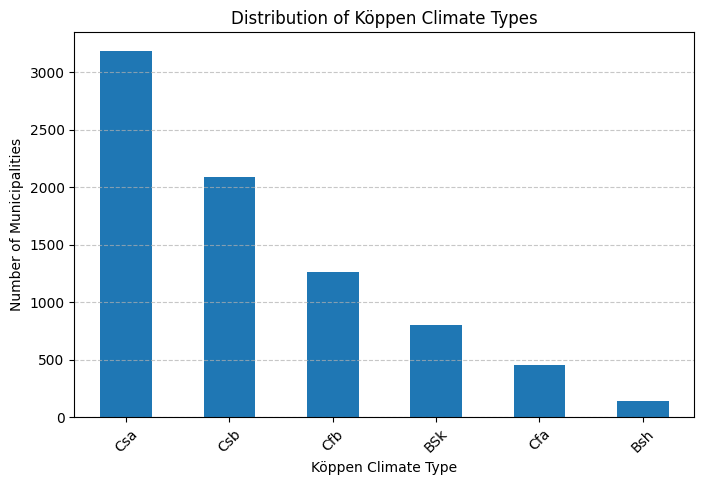

In [11]:
import matplotlib.pyplot as plt

# Count occurrences of each climate type
climate_counts = df_climate['Koppen_Climate'].value_counts()

# Plot the histogram
plt.figure(figsize=(8, 5))
climate_counts.plot(kind='bar')

# Customize the plot
plt.xlabel("Köppen Climate Type")
plt.ylabel("Number of Municipalities")
plt.title("Distribution of Köppen Climate Types")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [12]:

import plotly.express as px

# Create the Interactive Map with Hover Text
fig = px.scatter_mapbox(df_climate, 
                        lat="latitude",  
                        lon="longitude",  
                        color="Koppen_Climate",  
                        hover_data=["Koppen_Climate", "description"],  # Shows climate and description on hover
                        zoom=5,
                        size_max=50,
                        color_discrete_sequence=px.colors.qualitative.Set1  
                        )

# Set map style
fig.update_layout(mapbox_style="open-street-map")

# Show the figure
fig.show()


/var/folders/w9/bt5d4t050m7fd91t2r7l1mlh0000gn/T/ipykernel_71855/922296677.py:4: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(df_climate,


In [13]:
df_climate["province"].unique()

array(['Álava', 'Albacete', 'Alicante', 'Almería', 'Ávila', 'Badajoz',
       'Illes Balears', 'Barcelona', 'Burgos', 'Cáceres', 'Cádiz',
       'Castellón', 'Ciudad Real', 'Córdoba', 'A Coruña', 'Cuenca',
       'Girona', 'Granada', 'Guadalajara', 'Gipuzkoa', 'Huelva', 'Huesca',
       'Jaén', 'León', 'Lleida', 'La Rioja', 'Lugo', 'Madrid', 'Málaga',
       'Murcia', 'Navarra', 'Ourense', 'Asturias', 'Palencia',
       'Pontevedra', 'Salamanca', 'Santa Cruz de Tenerife', 'Cantabria',
       'Segovia', 'Sevilla', 'Soria', 'Tarragona', 'Teruel', 'Toledo',
       'Valencia', 'Valladolid', 'Bizkaia', 'Zamora', 'Zaragoza', 'Ceuta',
       'Melilla'], dtype=object)

In [14]:
df_climate.to_csv("../data/processed/filtered_climate.csv", index=False)